In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
df = pd.read_csv('./bihar_election_results.csv')
df.head()

,Constituency Number,Constituency Name,Serial Number,Candidate Name,Party,EVM Votes,Postal Votes,Total Votes,Vote Percentage
0,1,VALMIKI NAGAR,1,DHIRENDRA PRATAP SINGH ALIAS RINKU SINGH,Janata Dal (United),105771,284,106055,45.39
1,1,VALMIKI NAGAR,2,RAMESHWAR YADAV,Bahujan Samaj Party,5294,18,5312,2.27
2,1,VALMIKI NAGAR,3,SURENDRA PRASAD,Indian National Congress,107374,356,107730,46.11
3,1,VALMIKI NAGAR,4,RAJESH SHARMA,Lok Samaj Party,2301,2,2303,0.99
4,1,VALMIKI NAGAR,5,AZHARUDDIN ANSARI,Independent,1553,1,1554,0.67


In [111]:
len(df),len(df.columns)

(2859, 9)

In [112]:
df.shape

(2859, 9)

In [113]:
df.columns

Index(['Constituency Number', 'Constituency Name', 'Serial Number',
       'Candidate Name', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       'Vote Percentage'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Constituency Number  2859 non-null   int64  
 1   Constituency Name    2859 non-null   object 
 2   Serial Number        2859 non-null   int64  
 3   Candidate Name       2859 non-null   object 
 4   Party                2859 non-null   object 
 5   EVM Votes            2859 non-null   int64  
 6   Postal Votes         2859 non-null   int64  
 7   Total Votes          2859 non-null   int64  
 8   Vote Percentage      2859 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 201.2+ KB


In [115]:
df.describe()

,Constituency Number,Serial Number,EVM Votes,Postal Votes,Total Votes,Vote Percentage
count,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000
mean,127.169290,6.804127,17499.197971,62.093739,17561.291710,8.499465
std,69.288547,4.101422,32948.479007,128.585714,33058.819081,15.864663
min,1.000000,1.000000,90.000000,0.000000,90.000000,0.050000
25%,68.000000,3.000000,967.500000,1.000000,968.500000,0.470000
50%,128.000000,6.000000,2270.000000,4.000000,2276.000000,1.110000
75%,189.000000,10.000000,6165.500000,37.000000,6187.500000,3.015000
max,243.000000,23.000000,140370.000000,855.000000,140608.000000,62.660000


In [116]:
df[[col for col in df.select_dtypes('object')]].describe()

,Constituency Name,Candidate Name,Party
count,2859,2859,2859
unique,241,2268,163
top,PIPRA,NOTA,Independent
freq,26,243,925


In [117]:
df['Constituency Number'].nunique()

243

lets see who won the more seats in election


In [118]:
winnig_parties = df.groupby('Constituency Number')['Total Votes'].idxmax()
winners = df.loc[winnig_parties]['Party'].value_counts()

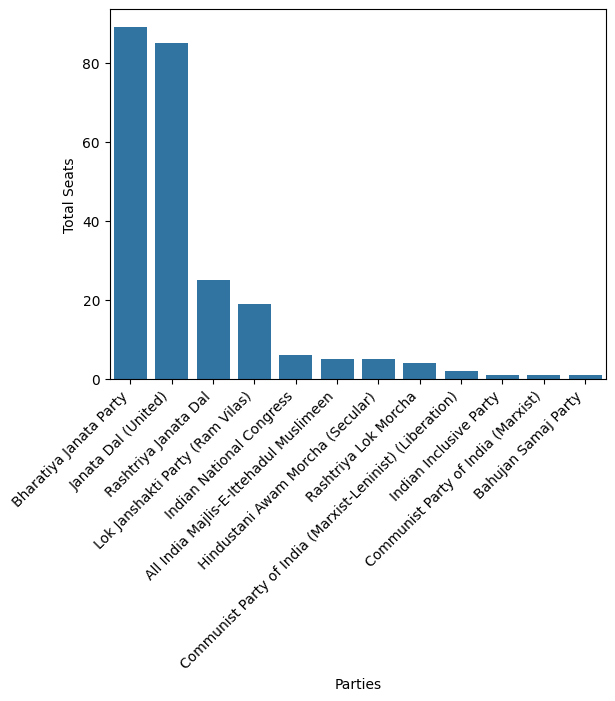

In [119]:


ax = sns.barplot(winners)
plt.xlabel('Parties')
plt.ylabel("Total Seats")
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')


lets see which constitution has more votes

In [120]:
df.columns

Index(['Constituency Number', 'Constituency Name', 'Serial Number',
       'Candidate Name', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       'Vote Percentage'],
      dtype='object')

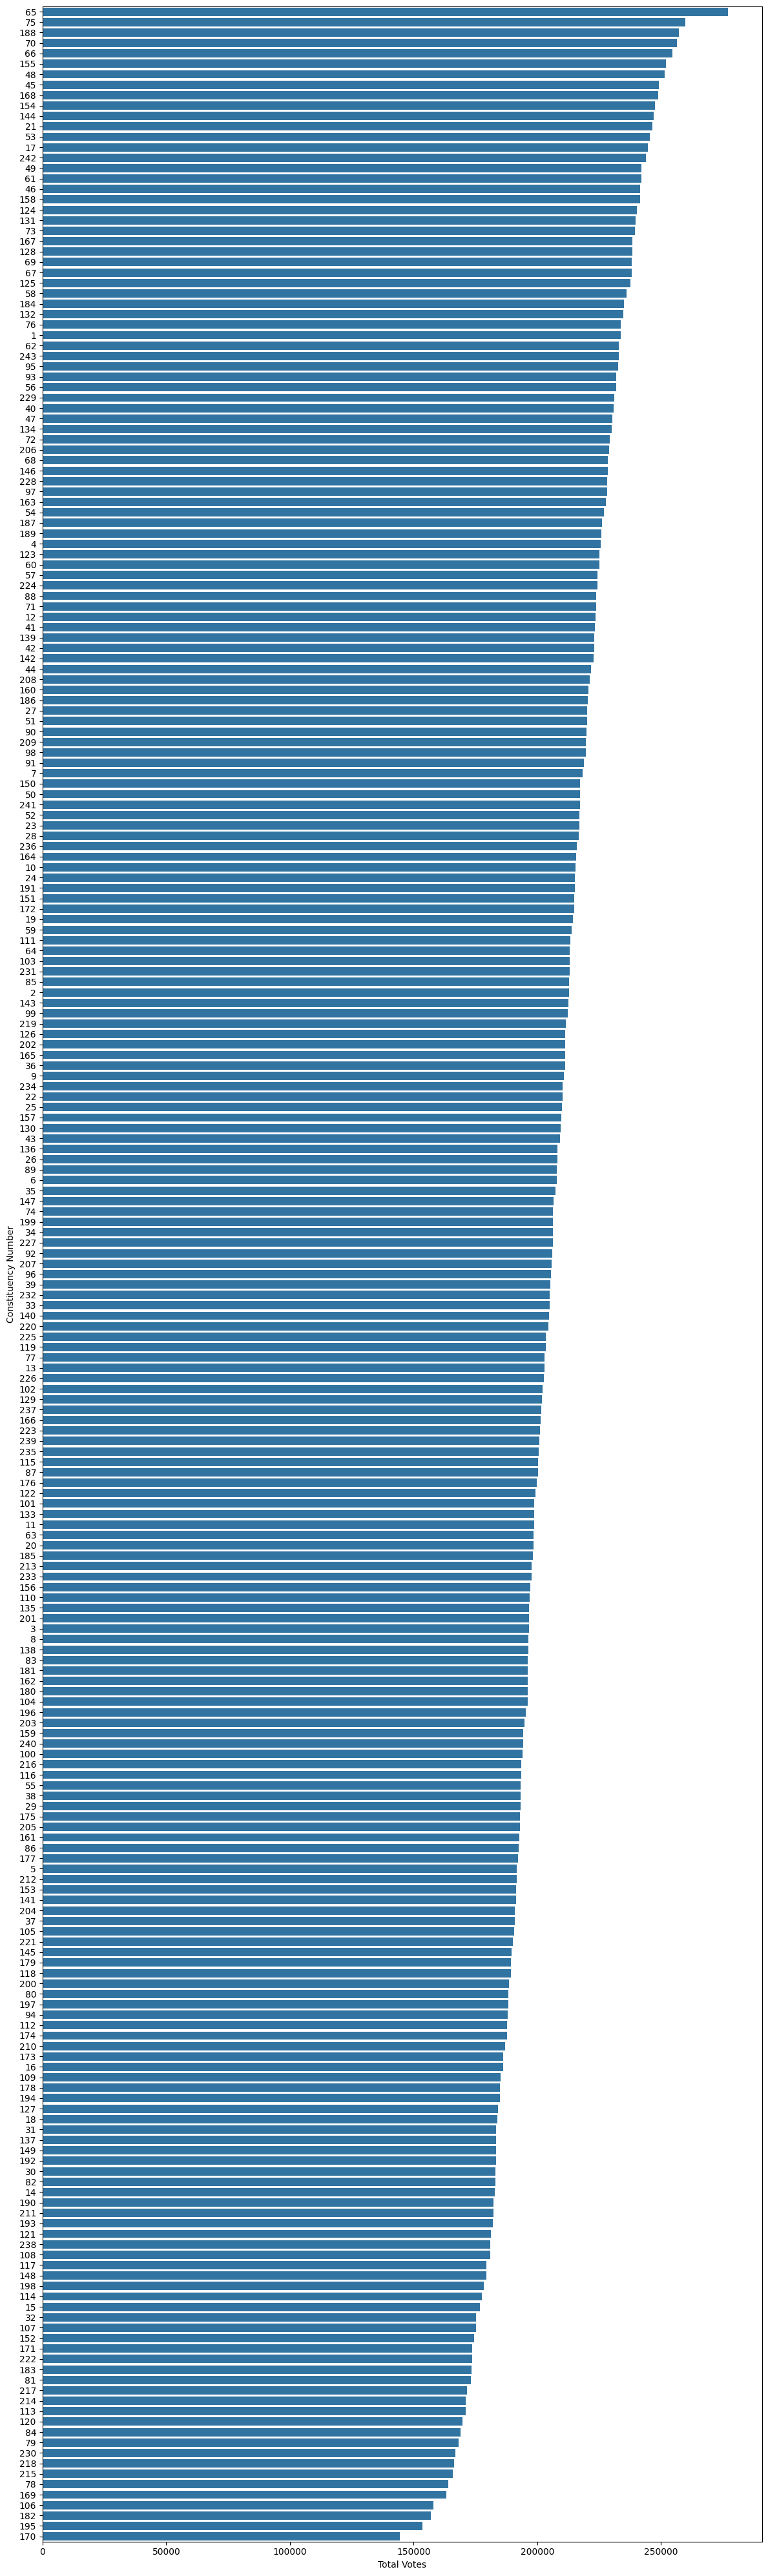

In [121]:

total_voter_per_cons=df.groupby('Constituency Number')['Total Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 40))
sns.barplot(
    x=total_voter_per_cons.values,
    y=total_voter_per_cons.index,
    orient='h',
    order=total_voter_per_cons.index
)
plt.xlabel("Total Votes")
plt.ylabel("Constituency Number")
plt.tight_layout()
plt.show()


lets see which constituency got the highest votes

In [122]:
df.groupby('Constituency Number')['Vote Percentage'].max().idxmax()

np.int64(182)

182 Constituency got the highest voting

lets see total won/total participated

In [123]:
constituency_groups = df.groupby('Constituency Number')

In [124]:
parties_group = df.groupby('Party')


parties_group.apply(lambda x : x)


C:\Users\karth\AppData\Local\Temp\ipykernel_20220\47930675.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  parties_group.apply(lambda x : x)


Constituency Number Constituency Name  \
Party                                                                    
Aadarsh Mithila Party      319                    33          KHAJAULI   
                           764                    73         MADHEPURA   
                           1493                  133        SAMASTIPUR   
Aam Aadmi Party            69                      9             SIKTA   
                           108                    14        GOVINDGANJ   
...                                              ...               ...   
Voters Party International 2230                  196            TARARI   
Wazib Adhikar Party        852                    80           BENIPUR   
                           896                    83         DARBHANGA   
Yuva Devlop Party          1356                  123           HAJIPUR   
Yuva Samriddhi Dal         2623                  225             GURUA   

                                 Serial Number     Candidate Name  \
Party                                                               
Aadarsh Mithila Party      319               4     RATNESHWAR JHA   
                           764               5    KAMESHWAR YADAV   
                           1493              8     PREMJEET KUMAR   
Aam Aadmi Party            69                1          AURANGJEB   
                           108               2  ASHOK KUMAR SINGH   
...                                        ...                ...   
Voters Party International 2230              7      NARAYAN SINGH   
Wazib Adhikar Party        852               7      VIDYANAND RAM   
                           896               9  RANJEET KUMAR RAM   
Yuva Devlop Party          1356              7  DHEERAJ KUMAR ROY   
Yuva Samriddhi Dal         2623              5         ANIL SINGH   

                                                      Party  EVM Votes  \
Party                                                                    
Aadarsh Mithila Party      319        Aadarsh Mithila Party        528   
                           764        Aadarsh Mithila Party        447   
                           1493       Aadarsh Mithila Party        431   
Aam Aadmi Party            69               Aam Aadmi Party       2510   
                           108              Aam Aadmi Party        929   
...                                                     ...        ...   
Voters Party International 2230  Voters Party International        186   
Wazib Adhikar Party        852          Wazib Adhikar Party        815   
                           896          Wazib Adhikar Party        851   
Yuva Devlop Party          1356           Yuva Devlop Party        419   
Yuva Samriddhi Dal         2623          Yuva Samriddhi Dal       1170   

                                 Postal Votes  Total Votes  Vote Percentage  
Party                                                                        
Aadarsh Mithila Party      319              4          532             0.26  
                           764              1          448             0.19  
                           1493             0          431             0.22  
Aam Aadmi Party            69               2         2512             1.19  
                           108              0          929             0.51  
...                                       ...          ...              ...  
Voters Party International 2230             1          187             0.10  
Wazib Adhikar Party        852              1          816             0.43  
                           896              1          852             0.43  
Yuva Devlop Party          1356             5          424             0.19  
Yuva Samriddhi Dal         2623             1         1171             0.58  

[2859 rows x 9 columns]

In [125]:
parties_group = df.groupby('Party')

def f(df):
    row_ids = df.index

    total_participated = df['Constituency Number'].nunique()

    total_won = winnig_parties.isin(row_ids).sum()
    return pd.Series({
        'total participated': total_participated,
        'total won': total_won
    })
parties = parties_group.apply(f,include_groups=False)


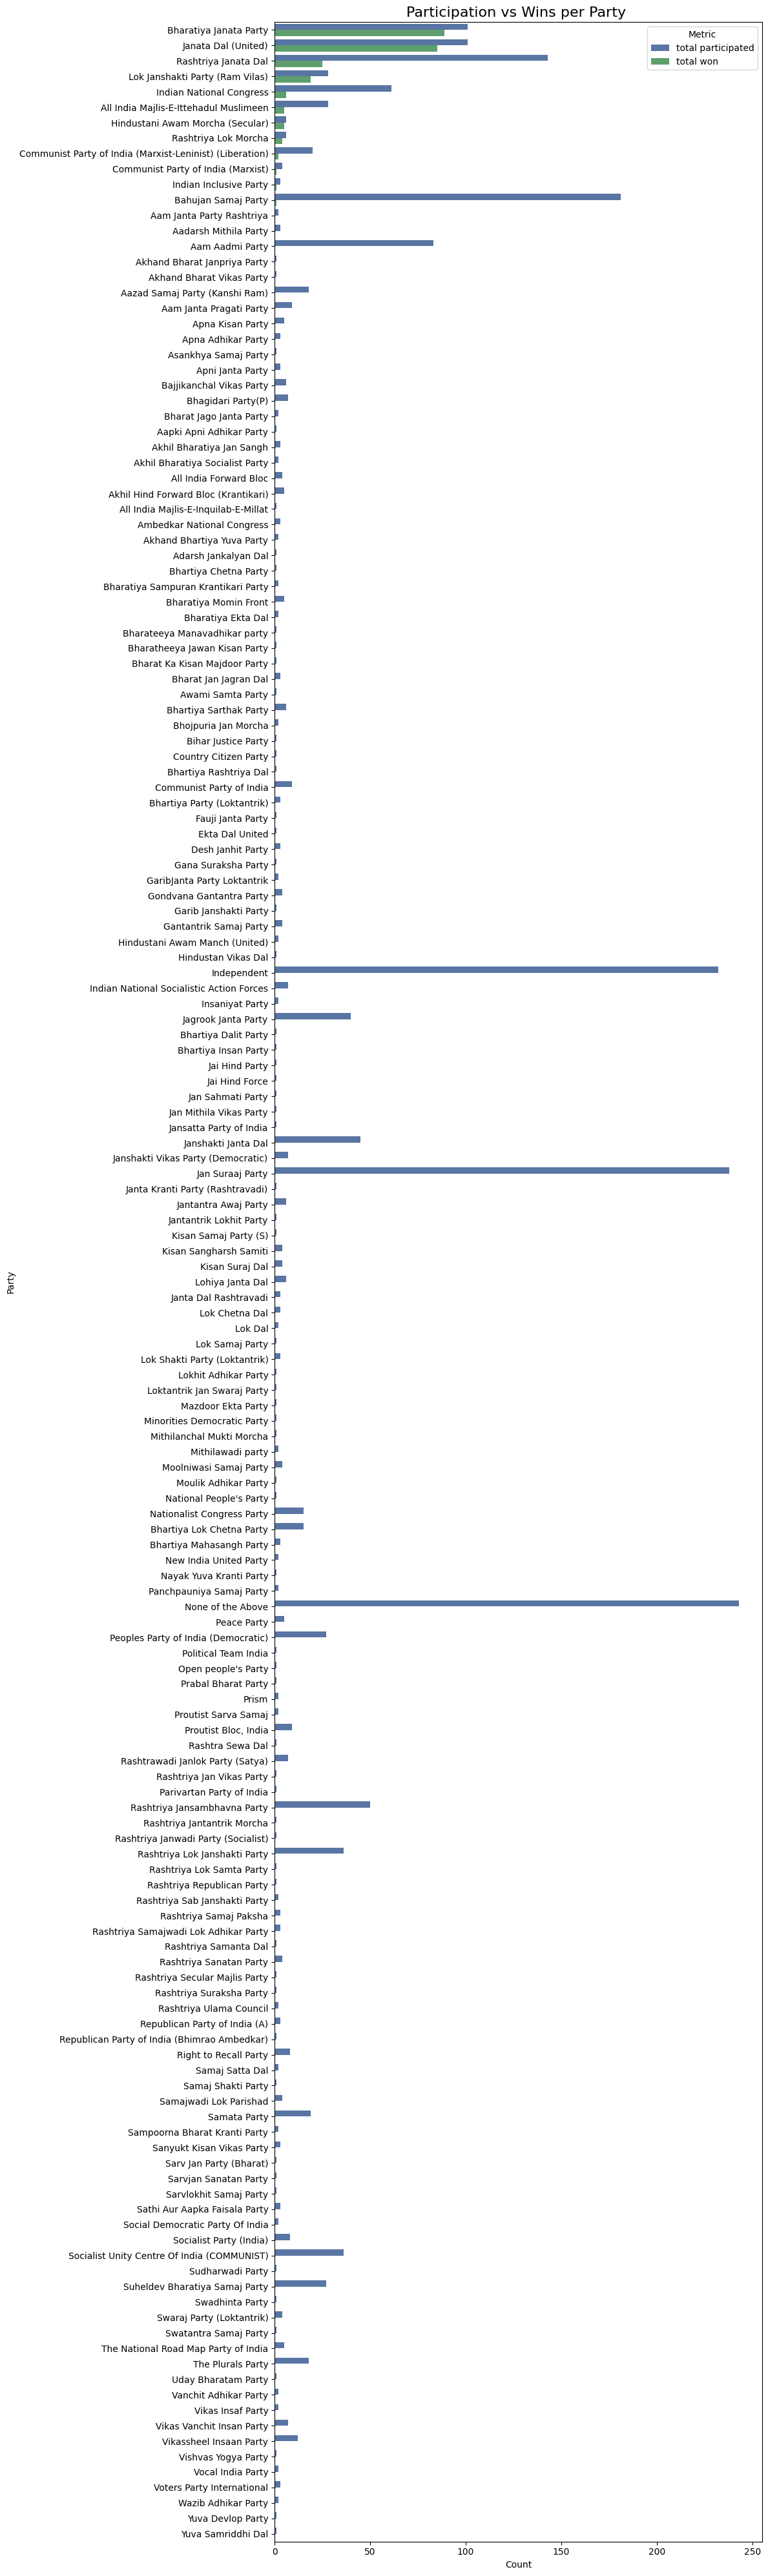

In [126]:

df_plot = parties.sort_values('total won', ascending=False).reset_index()


df_plot_melted = df_plot.melt(
    id_vars='Party',
    value_vars=['total participated', 'total won'],
    var_name='Metric',
    value_name='Count'
)

plt.figure(figsize=(12, 40))

sns.barplot(
    data=df_plot_melted,
    y='Party',
    x='Count',
    hue='Metric',
    palette=['#4C72B0', '#55A868'],
    dodge=True
)

plt.title("Participation vs Wins per Party ", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Party")

plt.tight_layout()
plt.show()


lets see who given tough competitons in there constituency

In [127]:
df.columns

Index(['Constituency Number', 'Constituency Name', 'Serial Number',
       'Candidate Name', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       'Vote Percentage'],
      dtype='object')

In [128]:
def parties_tough_competiton(group, threshold=5):
    highest = group['Vote Percentage'].max()
    won_party_name=group.loc[group['Vote Percentage'].idxmax(),'Party']

    low_parties = group.loc[
        (group['Vote Percentage'] >= highest - threshold) & 
        (group['Vote Percentage'] < highest), 
        'Party'
    ].tolist()
    return pd.Series({'Tough Competitors': low_parties,'Party Won':won_party_name})

result = df.groupby('Constituency Number').apply(parties_tough_competiton,threshold = 5,include_groups=False)
result



,Tough Competitors,Party Won
Constituency Number,,
1,[Janata Dal (United)],Indian National Congress
2,[],Bharatiya Janata Party
3,[],Bharatiya Janata Party
4,[Indian National Congress],Bharatiya Janata Party
5,[],Bharatiya Janata Party
...,...,...
239,[Bharatiya Janata Party],Rashtriya Janata Dal
240,[],Hindustani Awam Morcha (Secular)
241,[],Bharatiya Janata Party


if the competitor tries more in next election chances there to win in next election